## Bank Churn Prediction by Abimbola Salami

### Background and Context

Businesses like banks that provide service have to worry about the problem of 'Churn' i.e. customers leaving and joining another service provider. It is important to understand which aspects of the service influence a customer's decision in this regard. Management can concentrate efforts on the improvement of service, keeping in mind these priorities.

### Objective

Given a Bank customer, build a neural network-based classifier that can determine whether they will leave or not in the next 6 months.

### Data Description

The case study is from an open-source dataset from Kaggle. The dataset contains 10,000 sample points with 14 distinct features such as CustomerId, CreditScore, Geography, Gender, Age, Tenure, Balance, etc.

### Data Dictionary

- CustomerId: Unique ID which is assigned to each customer
- Surname: Last name of the customer 
- CreditScore: It defines the credit history of the customer.  
- Geography: A customer’s location    
- Gender: It defines the Gender of the customer   
- Age: Age of the customer     
- Tenure: Number of years for which the customer has been with the bank
- NumOfProducts: It refers to the number of products that a customer has purchased through the bank.
- Balance: Account balance
- HasCrCard: It is a categorical variable that decides whether the customer has a credit card or not.
- EstimatedSalary: Estimated salary 
- isActiveMember: It is a categorical variable that decides whether the customer is an active member of the bank or not ( Active member in the sense, using bank products regularly, making transactions, etc )
- Excited: It is a categorical variable that decides whether the customer left the bank within six months or not. It can take two values 
                    0=No ( Customer did not leave the bank )

                    1=Yes ( Customer left the bank )




### Importing all necessary libraries


In [1]:
# Importing python libraries
# To help with reading and manipulating data
import pandas as pd
import numpy as np
# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# To split data
from sklearn.model_selection import train_test_split
# To be used for data scaling and one hot encoding
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
# To get different metric scores
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_auc_score, roc_curve
from tensorflow.keras.models import Sequential #---Sequential ANN; Each layer is connected to the next layer
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras import optimizers
from tensorflow import keras
import random as rn
# To supress warnings
import warnings

warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf #importing tensorflow
print(tf.__version__)

2.6.0


In [3]:
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
PYTHONHASHSEED=0

In [4]:
tf.random.set_seed(1234)
np.random.seed(1234)
rn.seed(1234)

In [5]:
#Mounting my drive

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
%cd /content/drive/My Drive/Bank_Churn

/content/drive/My Drive/Bank_Churn


In [7]:
# Reading the dataset

bank_churn =pd.read_csv('bank.csv', index_col='RowNumber')

bank_churn.head(10)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0


In [8]:
bank_churn.shape

(10000, 13)

- The dataset contains 10,000 rows and 13 columns
- The column CustomerID will be dropped as it is not required in the analysis
- The column Surname contains '?' which might require treatment
- The dependent variable is Exited

In [9]:
# Checking for duplicates

bank_churn[bank_churn.duplicated()].count()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

- The dataset doesn't contain any duplicates

In [10]:
#Checking the datatypes and for null data

bank_churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


- The dataset contains int64, float64 and object datatypes
- The object datatypes will be converted to category

In [11]:
#Checking for unique values

bank_churn.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [12]:
#Statisitical summary of dataset

bank_churn.describe().round(0).T

,count,mean,std,min,25%,50%,75%,max
CustomerId,10000.0,15690941.0,71936.0,15565701.0,15628528.0,15690738.0,15753234.0,15815690.0
CreditScore,10000.0,651.0,97.0,350.0,584.0,652.0,718.0,850.0
Age,10000.0,39.0,10.0,18.0,32.0,37.0,44.0,92.0
Tenure,10000.0,5.0,3.0,0.0,3.0,5.0,7.0,10.0
Balance,10000.0,76486.0,62397.0,0.0,0.0,97199.0,127644.0,250898.0
NumOfProducts,10000.0,2.0,1.0,1.0,1.0,1.0,2.0,4.0
HasCrCard,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
IsActiveMember,10000.0,1.0,0.0,0.0,0.0,1.0,1.0,1.0
EstimatedSalary,10000.0,100090.0,57510.0,12.0,51002.0,100194.0,149388.0,199992.0
Exited,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


- The CreditScore ranges from 350 to 850 with an average of 651
- The Age ranges from 18 years to 92 years with an average of 39 years old
- The average duration the customers have been with the bank is 5 years
- The average account balance of Customers with the bank is 76,486
- The average number of products purchased by the customers is 2
- The average EstimatedSalary of customers is 100,090

### Data Preprocessing

In [13]:
col = bank_churn.select_dtypes(["object"])
col.columns

Index(['Surname', 'Geography', 'Gender'], dtype='object')

In [14]:
#Converting all objects datatypes to category datatypes

for i in col.columns:
    bank_churn[i] = bank_churn[i].astype("category")

In [15]:
#Converting 'Hascrcard', 'IsActiveMember' to category datatypes

bank_churn["HasCrCard"] = bank_churn["HasCrCard"].astype("category")
bank_churn["IsActiveMember"] = bank_churn["IsActiveMember"].astype("category")

In [16]:
cat_col = bank_churn.select_dtypes(["category"])

In [17]:
# Displaying unique values for category variables

for i in cat_col.columns:  
    print("Unique values in", i, "are :")
    print(cat_col[i].value_counts())
    print("*" * 50)

Unique values in Surname are :
Smith        32
Martin       29
Scott        29
Walker       28
Brown        26
             ..
Perreault     1
Perkin        1
Percy         1
Hardacre      1
Fancher       1
Name: Surname, Length: 2932, dtype: int64
**************************************************
Unique values in Geography are :
France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64
**************************************************
Unique values in Gender are :
Male      5457
Female    4543
Name: Gender, dtype: int64
**************************************************
Unique values in HasCrCard are :
1    7055
0    2945
Name: HasCrCard, dtype: int64
**************************************************
Unique values in IsActiveMember are :
1    5151
0    4849
Name: IsActiveMember, dtype: int64
**************************************************


- There are 3 countries in the datatset with France having the highest population
- The male customers are more than the female customers
- There are more customers with Credit cards in the dataset
There are more active customers in the dataset

In [18]:
#Dropping CustomerId and Surname from the datatset

bank_churn = bank_churn.drop(['Surname', 'CustomerId'], axis = 1)

In [19]:
bank_churn["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

- Most of the customers did not leave the bank

## Exploratory Data Analysis


###Univariate Analysis of variables

In [20]:
bank_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [21]:
corr_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

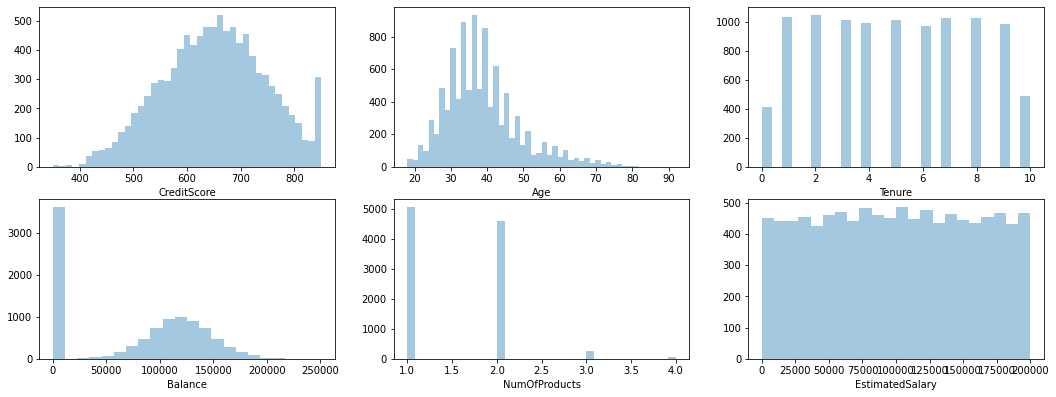

In [22]:
plt.figure(figsize=(18, 10))

pos = 1

for i in corr_cols:

    plt.subplot(3, 3, pos)

    sns.distplot(bank_churn[i], kde=False)

    pos += 1

- CreditScore and Age are normally distributed
- EstimatedSalary is uniformly distributed


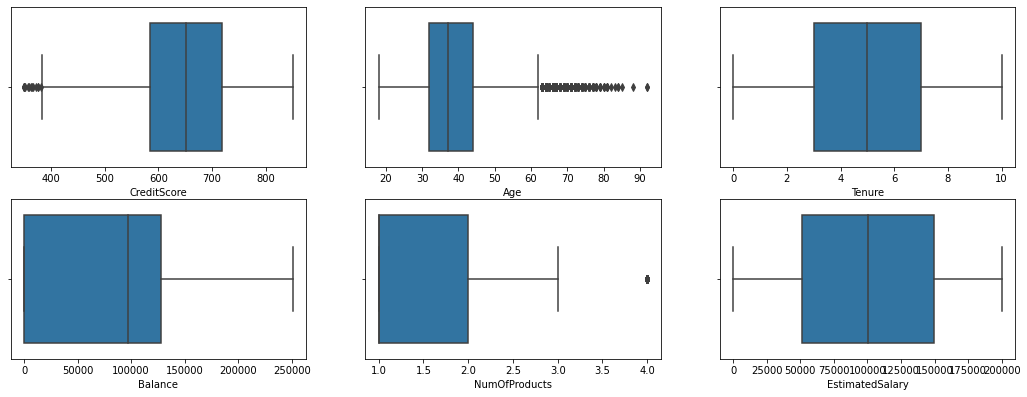

In [23]:
# Checking for Outliers

plt.figure(figsize=(18, 10))

pos = 1

for i in corr_cols:

    plt.subplot(3, 3, pos)

    sns.boxplot(bank_churn[i])

    pos += 1

There are outliers present in CreditScore, Age and NumOfProducts

In [24]:
# Function to create barplots that indicate percentage for each category.

def perc_on_bar(plot, feature):
    """
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    """
    total = len(feature)  # length of the column
    for p in ax.patches:
        percentage = "{:.1f}%".format(
            100 * p.get_height() / total
        )  # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.05  # width of the plot
        y = p.get_y() + p.get_height()  # hieght of the plot
        ax.annotate(percentage, (x, y), size=12)  # annotate the percantage
    plt.show()  # show the plot

In [25]:
cat_col.columns

Index(['Surname', 'Geography', 'Gender', 'HasCrCard', 'IsActiveMember'], dtype='object')

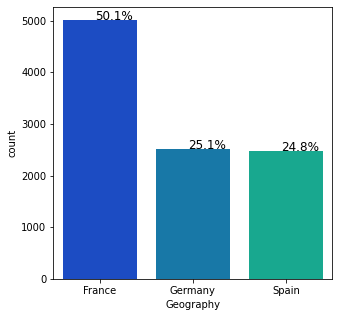

In [26]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_churn['Geography'], palette="winter")
perc_on_bar(ax, bank_churn['Geography'])

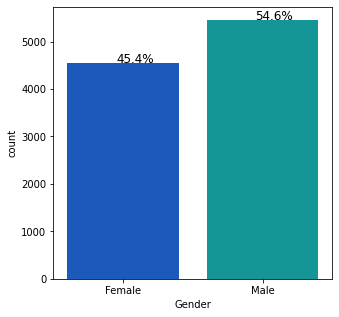

In [27]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_churn['Gender'], palette="winter")
perc_on_bar(ax, bank_churn['Gender'])

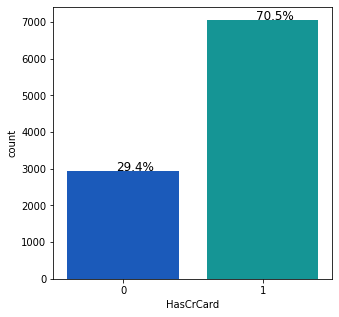

In [28]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_churn['HasCrCard'], palette="winter")
perc_on_bar(ax, bank_churn['HasCrCard'])

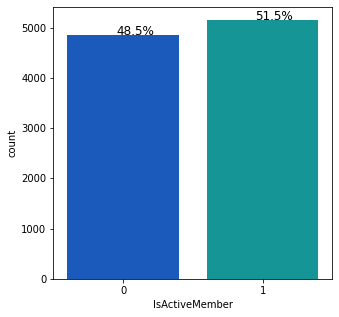

In [29]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_churn['IsActiveMember'], palette="winter")
perc_on_bar(ax, bank_churn['IsActiveMember'])

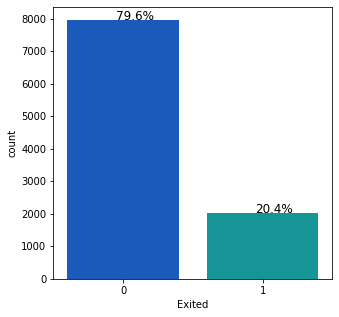

In [30]:
plt.figure(figsize=(5, 5))
ax = sns.countplot(bank_churn['Exited'], palette="winter")
perc_on_bar(ax, bank_churn['Exited'])

## Bivariate Analysis and Multivariate Analysis

In [31]:
# Grouping Exited variables by mean
bank_churn.groupby('Exited').mean()

,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
Exited,,,,,,
0,651.853196,37.408389,5.033279,72745.296779,1.544267,99738.391772
1,645.351497,44.837997,4.932744,91108.539337,1.475209,101465.677531


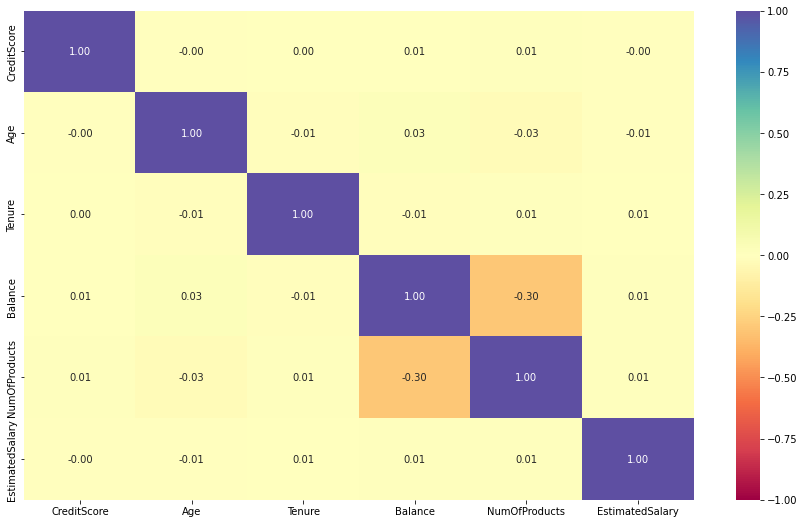

In [32]:
plt.figure(figsize=(15, 9))

sns.heatmap(
    bank_churn[corr_cols].corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral"
)
plt.show()

In [33]:
# function to plot stacked bar chart

def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(10, 5))
    plt.legend(
        loc="lower left",
        frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

In [34]:
bank_churn.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

Exited        0     1    All
Geography                   
All        7963  2037  10000
Germany    1695   814   2509
France     4204   810   5014
Spain      2064   413   2477
------------------------------------------------------------------------------------------------------------------------


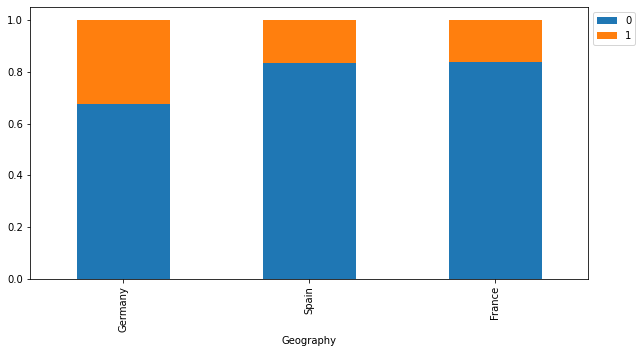

In [35]:
stacked_barplot(bank_churn, "Geography", "Exited")

Exited     0     1    All
Gender                   
All     7963  2037  10000
Female  3404  1139   4543
Male    4559   898   5457
------------------------------------------------------------------------------------------------------------------------


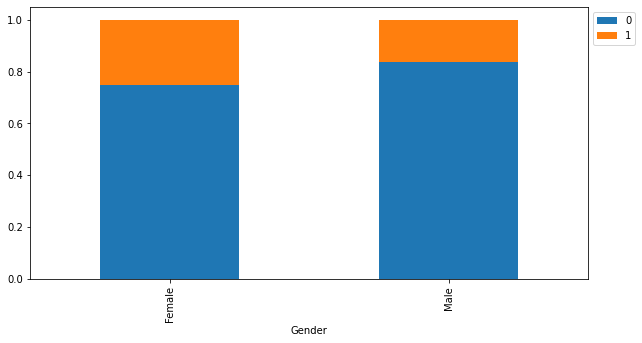

In [36]:
stacked_barplot(bank_churn, "Gender", "Exited")

Exited     0     1    All
Tenure                   
All     7963  2037  10000
1        803   232   1035
3        796   213   1009
9        771   213    984
5        803   209   1012
4        786   203    989
2        847   201   1048
8        828   197   1025
6        771   196    967
7        851   177   1028
10       389   101    490
0        318    95    413
------------------------------------------------------------------------------------------------------------------------


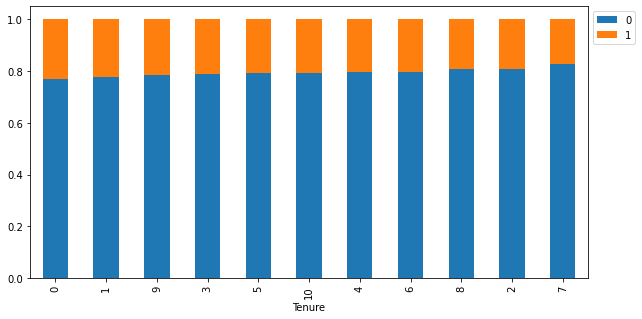

In [37]:
stacked_barplot(bank_churn, "Tenure", "Exited")

Exited            0     1    All
NumOfProducts                   
All            7963  2037  10000
1              3675  1409   5084
2              4242   348   4590
3                46   220    266
4                 0    60     60
------------------------------------------------------------------------------------------------------------------------


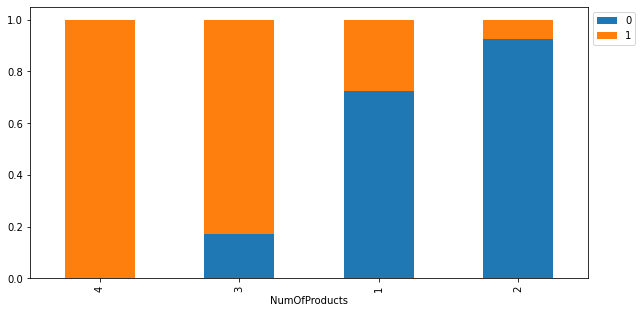

In [38]:
stacked_barplot(bank_churn, "NumOfProducts", "Exited")

Exited        0     1    All
HasCrCard                   
All        7963  2037  10000
1          5631  1424   7055
0          2332   613   2945
------------------------------------------------------------------------------------------------------------------------


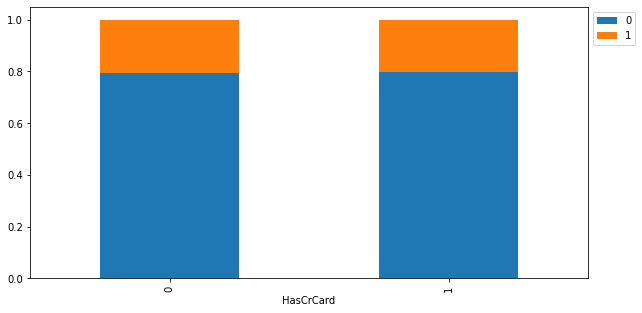

In [39]:
stacked_barplot(bank_churn, "HasCrCard", "Exited")

Exited             0     1    All
IsActiveMember                   
All             7963  2037  10000
0               3547  1302   4849
1               4416   735   5151
------------------------------------------------------------------------------------------------------------------------


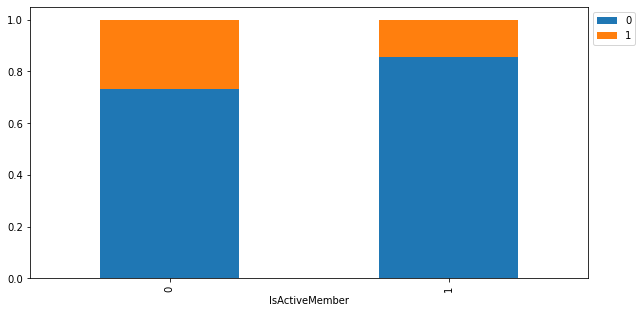

In [40]:
stacked_barplot(bank_churn, "IsActiveMember", "Exited")

## Data pre-processing

In [41]:
# Creating dummy variables using One-Hot Encoding
bank_churn = pd.get_dummies(bank_churn,drop_first=True)

In [42]:
# Splitting target and input variables
X = bank_churn.drop('Exited', axis=1)
y = bank_churn['Exited']

In [43]:
# Splitting data into training, validation and test set:

X_temp, X_test, y_temp, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1, stratify=y
)

X_train, X_val, y_train, y_val = train_test_split(
    X_temp, y_temp, test_size=0.25, random_state=1, stratify=y_temp
)
print(X_train.shape, X_val.shape, X_test.shape)

(6000, 11) (2000, 11) (2000, 11)


In [44]:
print("Number of rows in train data is", X_train.shape[0])
print("Number of rows in validation data is", X_val.shape[0])
print("Number of rows in test data is", X_test.shape[0])

Number of rows in train data is 6000
Number of rows in validation data is 2000
Number of rows in test data is 2000


In [45]:
# Scaling the data using sklearn standard scaler
Sc_X = StandardScaler()
X_train = Sc_X.fit_transform(X_train)
X_val = Sc_X.transform(X_val)
X_test = Sc_X.transform(X_test)

## Building the model

In [46]:
#initialize the model
bank_model = Sequential()

- Keras layers can be added to the model
- For the input and hidden layers we will use the ReLU function for activation while we will use the Sigmoid function for the ouput layer in order to get a probability ranging from 0 to 1.It should be noted that as this is a classification problem, sigmoid layer is used

In [47]:
# Input layer with 20 neurons connected an input of 11 columns
bank_model.add(Dense(units=20, input_dim = 11, activation='relu'))

# Hidden layer with 5 neurons
bank_model.add(Dense(units=5,activation='relu'))

# Output layer with 1 neuron
bank_model.add(Dense(1,activation='sigmoid'))

In [48]:
# Metrics definition in Keras in order to compute accuracy, precision and recall
METRICS = [ 
      tf.keras.metrics.BinaryAccuracy(name='accuracy'),
      tf.keras.metrics.Precision(name='precision'),
      tf.keras.metrics.Recall(name='recall'),
]

In [49]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
bank_model.compile(optimizer='adam',loss='binary_crossentropy',metrics=METRICS)

In [50]:
# Model Summary

bank_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 20)                240       
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


- The model has a total of 351 parameters including weights and biases

In [51]:
#fitting the model

history = bank_model.fit(X_train,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
150/150 [==============================] - 2s 5ms/step - loss: 0.7027 - accuracy: 0.5942 - precision: 0.2017 - recall: 0.3374 - val_loss: 0.5336 - val_accuracy: 0.7933 - val_precision: 0.4706 - val_recall: 0.0324
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4940 - accuracy: 0.7977 - precision: 0.6429 - recall: 0.0092 - val_loss: 0.4502 - val_accuracy: 0.8025 - val_precision: 1.0000 - val_recall: 0.0405
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4501 - accuracy: 0.8021 - precision: 0.6923 - recall: 0.0462 - val_loss: 0.4184 - val_accuracy: 0.8192 - val_precision: 0.8409 - val_recall: 0.1498
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4297 - accuracy: 0.8133 - precision: 0.7158 - recall: 0.1344 - val_loss: 0.4020 - val_accuracy: 0.8292 - val_precision: 0.7625 - val_recall: 0.2470
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4145 - accuracy: 0.8181

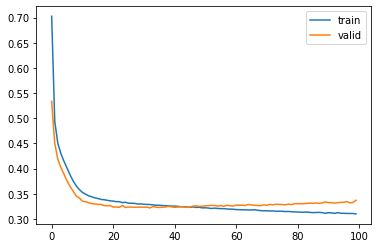

In [52]:
# Capturing learning history per epoch
hist  = pd.DataFrame(history.history)
hist['epoch'] = history.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train", "valid") , loc =0)

- There is a massive drop in the log loss for the validation and train set from the chart above
- The model tends to overfit when greater than 40 epoch
- There is a continous decrease in the loss showing a learning model

In [53]:
hist.head()

,loss,accuracy,precision,recall,val_loss,val_accuracy,val_precision,val_recall,epoch
0,0.702720,0.594167,0.201717,0.337436,0.533583,0.793333,0.470588,0.032389,0
1,0.493997,0.797708,0.642857,0.009231,0.450213,0.802500,1.000000,0.040486,1
2,0.450144,0.802083,0.692308,0.046154,0.418445,0.819167,0.840909,0.149798,2
3,0.429668,0.813333,0.715847,0.134359,0.401974,0.829167,0.762500,0.246964,3
4,0.414460,0.818125,0.662420,0.213333,0.388859,0.834167,0.735294,0.303644,4


### Model evaluation criterion

**Model can make wrong predictions as**:

1. False Positive: Where  a customer does not exit the bank and the model predicts that the customer is going to exit the bank, making the bank channelling efforts and resources to keep the customer when not required

2. False Negative: Where a customer exits the bank and the model predicts that the customer is not going to exit making the bank loose a customer that might have been kept if the right efforts were made to keeping him/ her..

**Which case is more important?**
- Opportunity Loss

**How to reduce this loss i.e need to reduce False Negatives?**
- Recall should be maximized, the greater the Recall, the higher the chances of decreasing the false negatives.
- Recall aims at avoiding a lost opportunity
- Recall gives the ratio of True positives to Actual positives, so high Recall implies low false negatives.

In [54]:
# Performance on train set:
train_scores= bank_model.evaluate(X_train, y_train)

188/188 [==============================] - 0s 1ms/step - loss: 0.3130 - accuracy: 0.8695 - precision: 0.7604 - recall: 0.5245


In [55]:
# Performance on validation set:
val_scores= bank_model.evaluate(X_val, y_val)

63/63 [==============================] - 0s 1ms/step - loss: 0.3668 - accuracy: 0.8485 - precision: 0.6937 - recall: 0.4608


In [56]:
# Performance on test set:
test_scores = bank_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3682 - accuracy: 0.8515 - precision: 0.7099 - recall: 0.4570


- The model achieves an accuracy of 86.95 on the training set, 84.85 on validation set and 85.15 on test set.
- The model has a relatively low recall across training, validation and test sets which requires improvement

In [57]:
# Function to compute confusion matrix
def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            precision = cf[1,1] / sum(cf[:,1])
            recall    = cf[1,1] / sum(cf[1,:])
            f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.3f}\nPrecision={:0.3f}\nRecall={:0.3f}\nF1 Score={:0.3f}".format(
                accuracy,precision,recall,f1_score)
        else:
            stats_text = "\n\nAccuracy={:0.3f}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

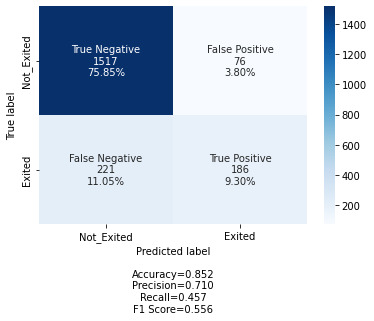

In [58]:
## Confusion Matrix on unseen test set

y_pred = bank_model.predict(X_test)

for i in range(len(y_test)): 
    if y_pred[i]>0.5: # Using default threshold of 0.5 for probability
        y_pred[i]=1 
    else:
        y_pred[i]=0

cm1=confusion_matrix(y_test, y_pred)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm1, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- The performance of the model is still poor with a recall of 45% while the accuracy and precision seem good
- The model failed to detect 221 customers out of 2,000 in the test set
- The train set has a higher recal than the test set accounting for an overfitting model

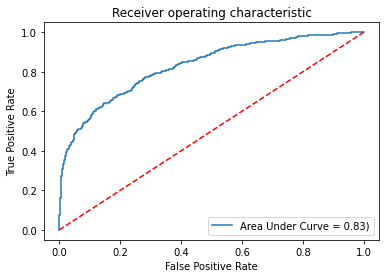

In [59]:
# ROC-AUC curve
logit_roc_auc = roc_auc_score(y_test, bank_model.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, bank_model.predict(X_test)) 
plt.figure()
plt.plot(fpr, tpr, label='Area Under Curve = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

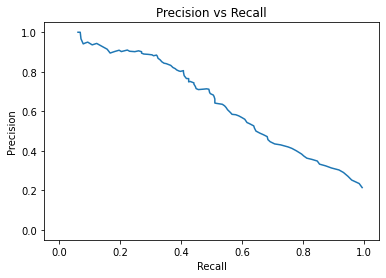

In [60]:
thresholds = np.arange(0.01, 1, .01)
recalls = []
precisions = []

for t in thresholds:
    y_pred_1 = bank_model.predict(X_test)
    
    for i in range(len(y_test)):
        if y_pred_1[i] > t:
            y_pred_1[i] = 1
        else:
            y_pred_1[i] = 0
        
    recalls.append(recall_score(y_test, y_pred_1))
    precisions.append(precision_score(y_test, y_pred_1))

plt.figure()
plt.plot(recalls, precisions)
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision vs Recall')
plt.show()

- The chart shows the rate of change of the recall and false postive rate at different thresholds.
- The neural network model is giving a good performance on training and test set but the recall is low

- In this model_1, a default probability threshold of 50% had been used to determine whether the customer would leave or not. If we decrease the threshold, we will increase the number of false positive and decrease the number of false negative hence increasing recall and decreasing precision.

The Model can be improved by:
- Decreasing the Threshold to Optimize Recall
- Using dropout to avoid overfiiting
- Adding hidden layers

**Buliding another model by adjusting probability threshold to 20%**

In [61]:
#initialize the model
bank_model2 = Sequential()

In [62]:
# Input layer with 20 neurons connected an input of 11 columns
bank_model2.add(Dense(units=20, input_dim = 11, activation='relu'))

# Hidden layer with 5 neurons
bank_model2.add(Dense(units=5,activation='relu'))

# Output layer with 1 neuron
bank_model2.add(Dense(1,activation='sigmoid'))

In [63]:
from tensorflow.keras.metrics import Recall, Accuracy, Precision

Rec=tf.keras.metrics.Recall(
    thresholds=0.2, top_k=None, class_id=None, name='recall', dtype=None
)

In [64]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
bank_model2.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Rec])

In [65]:
bank_model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_4 (Dense)              (None, 5)                 105       
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [66]:
his_mod1= bank_model2.fit(X_train, y_train, validation_split=0.2,epochs=100)


Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 0.5986 - accuracy: 0.7079 - recall: 0.9251 - val_loss: 0.4886 - val_accuracy: 0.8017 - val_recall: 0.8947
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4685 - accuracy: 0.8012 - recall: 0.8133 - val_loss: 0.4248 - val_accuracy: 0.8158 - val_recall: 0.8543
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4270 - accuracy: 0.8185 - recall: 0.7846 - val_loss: 0.3889 - val_accuracy: 0.8408 - val_recall: 0.8421
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4028 - accuracy: 0.8346 - recall: 0.7785 - val_loss: 0.3666 - val_accuracy: 0.8475 - val_recall: 0.8421
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3867 - accuracy: 0.8438 - recall: 0.7703 - val_loss: 0.3538 - val_accuracy: 0.8567 - val_recall: 0.8502
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3757 - accuracy: 0

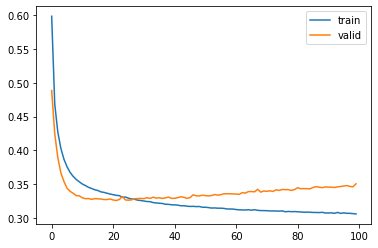

In [67]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod1.history)
hist['epoch'] = his_mod1.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)


In [68]:
# Model 2 performance:
print('Train scores:')
train_scores_2 = bank_model2.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_2 = bank_model2.evaluate(X_val, y_val)
print('Test scores:')
test_scores_2 = bank_model2.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 1ms/step - loss: 0.3124 - accuracy: 0.8728 - recall: 0.8061
Validation scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3547 - accuracy: 0.8545 - recall: 0.7623
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3753 - accuracy: 0.8500 - recall: 0.7297


- Recall score improves relative to the first model across training, vaidation and test set to 80%,76% and 72% respectively

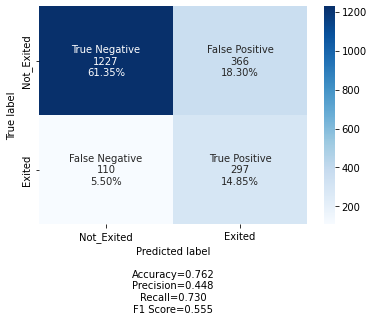

In [69]:
## Confusion Matrix using probability threshold of 0.2

y_pred2 = bank_model2.predict(X_test)

for i in range(len(y_test)): 
    if y_pred2[i] > 0.2: # Ajusting threshold to 0.2
        y_pred2[i] = 1 
    else:
        y_pred2[i] = 0

cm2=confusion_matrix(y_test, y_pred2)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm2, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- From the confusion matrix, the recall increased on the test set while the precision decreased
- The model is slightly overfitting

**Building a new model similar to the second model using 10% dropout to treat overfitting**

In [70]:
#initialize the model
bank_model3 = Sequential()

In [71]:
# Input layer with 20 neurons connected an input of 11 columns
bank_model3.add(Dense(units=20, input_dim = 11, activation='relu'))

# Hidden layer with 10 neurons
bank_model3.add(Dense(units=5,activation='relu'))

bank_model3.add(Dropout(0.10)) # Adding 10% dropout to reduce model's overfitting

# Output layer with 1 neuron
bank_model3.add(Dense(1,activation='sigmoid'))

In [72]:
from tensorflow.keras.metrics import Recall, Accuracy, Precision

Rec=tf.keras.metrics.Recall(
    thresholds=0.2, top_k=None, class_id=None, name='recall', dtype=None
)

In [73]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
bank_model3.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Rec])

In [74]:
bank_model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 20)                240       
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 105       
_________________________________________________________________
dropout (Dropout)            (None, 5)                 0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 351
Trainable params: 351
Non-trainable params: 0
_________________________________________________________________


In [75]:
his_mod2= bank_model3.fit(X_train, y_train, validation_split=0.2,epochs=100)

Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6010 - accuracy: 0.6806 - recall: 0.9303 - val_loss: 0.4943 - val_accuracy: 0.7983 - val_recall: 0.8623
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4871 - accuracy: 0.7887 - recall: 0.7415 - val_loss: 0.4404 - val_accuracy: 0.8092 - val_recall: 0.8300
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4637 - accuracy: 0.8023 - recall: 0.7344 - val_loss: 0.4182 - val_accuracy: 0.8150 - val_recall: 0.8178
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4500 - accuracy: 0.8112 - recall: 0.7344 - val_loss: 0.4045 - val_accuracy: 0.8258 - val_recall: 0.8219
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4345 - accuracy: 0.8154 - recall: 0.7446 - val_loss: 0.3933 - val_accuracy: 0.8325 - val_recall: 0.8421
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4243 - accuracy: 0

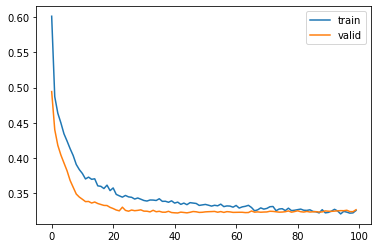

In [76]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod2.history)
hist['epoch'] = his_mod2.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [77]:
# Model 3 performance:
print('Train scores:')
train_scores_3 = bank_model3.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_3 = bank_model3.evaluate(X_val, y_val)
print('Test scores:')
test_scores_3 = bank_model3.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 1ms/step - loss: 0.3140 - accuracy: 0.8715 - recall: 0.8028
Validation scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3599 - accuracy: 0.8470 - recall: 0.7328
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3551 - accuracy: 0.8590 - recall: 0.7396


- Recall score improved relative to the second modelacross training, vaidation and test set to 79%,76% and 74% respectively

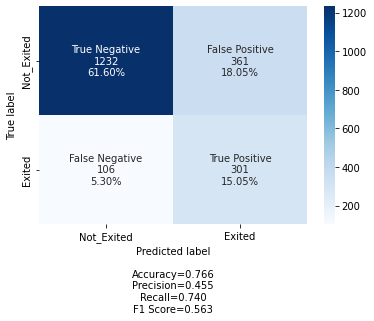

In [78]:
## Confusion Matrix

y_pred3 = bank_model3.predict(X_test)

for i in range(len(y_test)): 
    if y_pred3[i] > 0.2:
        y_pred3[i] = 1 
    else:
        y_pred3[i] = 0

cm3=confusion_matrix(y_test, y_pred3)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm3, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

**Building a new model similar to the third model with more hidden layers**

In [79]:
# Model 4 initialization
bank_model4 = Sequential([
    Dense(units=50, input_dim = X_train.shape[1], activation='relu'),
    Dropout(.25), # Adding 50% dropout to reduce model's overfitting
    Dense(units=10, activation='relu'),
    Dense(units=3,activation='relu'),
    Dense(1,activation='sigmoid')
    ])

In [80]:
from tensorflow.keras.metrics import Recall, Accuracy, Precision

Rec=tf.keras.metrics.Recall(
    thresholds=0.2, top_k=None, class_id=None, name='recall', dtype=None)

In [81]:
# Use Adam optimizer with default learning rate and binary_crossentropy loss function
bank_model4.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy',Rec])

In [82]:
bank_model4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 50)                600       
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                510       
_________________________________________________________________
dense_11 (Dense)             (None, 3)                 33        
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 4         
Total params: 1,147
Trainable params: 1,147
Non-trainable params: 0
_________________________________________________________________


In [83]:
his_mod3= bank_model4.fit(X_train, y_train, validation_split=0.2,epochs=100)

Epoch 1/100
150/150 [==============================] - 1s 4ms/step - loss: 0.6027 - accuracy: 0.7275 - recall: 0.9436 - val_loss: 0.4778 - val_accuracy: 0.7942 - val_recall: 0.8421
Epoch 2/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4610 - accuracy: 0.7975 - recall: 0.7108 - val_loss: 0.4280 - val_accuracy: 0.8008 - val_recall: 0.8219
Epoch 3/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4404 - accuracy: 0.8071 - recall: 0.7262 - val_loss: 0.4062 - val_accuracy: 0.8233 - val_recall: 0.7773
Epoch 4/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4258 - accuracy: 0.8242 - recall: 0.7118 - val_loss: 0.3878 - val_accuracy: 0.8433 - val_recall: 0.8016
Epoch 5/100
150/150 [==============================] - 0s 2ms/step - loss: 0.4079 - accuracy: 0.8344 - recall: 0.7385 - val_loss: 0.3649 - val_accuracy: 0.8567 - val_recall: 0.8381
Epoch 6/100
150/150 [==============================] - 0s 2ms/step - loss: 0.3947 - accuracy: 0

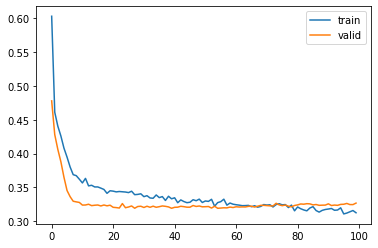

In [84]:
# Capturing learning history per epoch
hist  = pd.DataFrame(his_mod3.history)
hist['epoch'] = his_mod3.epoch

# Plotting accuracy at different epochs
plt.plot(hist['loss'])
plt.plot(hist['val_loss'])
plt.legend(("train" , "valid") , loc =0)

In [85]:
# Model 4 performance:
print('Train scores:')
train_scores_4 = bank_model4.evaluate(X_train, y_train)
print('Validation scores:')
train_scores_4 = bank_model4.evaluate(X_val, y_val)
print('Test scores:')
test_scores_4 = bank_model4.evaluate(X_test, y_test)

Train scores:
188/188 [==============================] - 0s 1ms/step - loss: 0.3004 - accuracy: 0.8793 - recall: 0.7987
Validation scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3560 - accuracy: 0.8560 - recall: 0.7500
Test scores:
63/63 [==============================] - 0s 1ms/step - loss: 0.3528 - accuracy: 0.8565 - recall: 0.7445


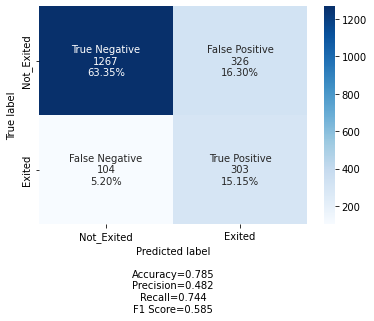

In [86]:
## Confusion Matrix using probability threshold of 0.2

y_pred4 = bank_model4.predict(X_test)

for i in range(len(y_test)): 
    if y_pred4[i] > 0.2: # Ajusting threshold to 0.2
        y_pred4[i] = 1 
    else:
        y_pred4[i] = 0

cm4=confusion_matrix(y_test, y_pred4)
labels = ['True Negative','False Positive','False Negative','True Positive']
categories = ['Not_Exited','Exited']

make_confusion_matrix(cm4, 
                      group_names=labels,
                      categories=categories, 
                      cmap='Blues')

- Adding more layers and neurons to the network only slightly improved the model's performance.
- Recall score improved slightly across training, vaidation and test set to 82%,76% and 75% respectively
- The performance of the model remains comparable to the fourth model 

### Model Comparison

In [87]:
comparison_frame = pd.DataFrame({'Model':['Simple Model','Model with 20% Threshold','Model with Drop-out',
                                         'Model with Added Layers and Neuron'], 'Train Accuracy':[0.87,0.87,0.88,0.88], 'Validation Accuracy':[0.85,0.85,0.85,0.85], 'Test Accuracy':[0.85,0.85,0.86,0.86],'Train Recall':[0.52,0.80,0.79,0.82], 'Validation Recall':[0.46,0.76,0.76,0.76], 'Test Recall':[0.46,0.72,0.74,0.75]}) 
comparison_frame

,Model,Train Accuracy,Validation Accuracy,Test Accuracy,Train Recall,Validation Recall,Test Recall
0,Simple Model,0.87,0.85,0.85,0.52,0.46,0.46
1,Model with 20% Threshold,0.87,0.85,0.85,0.80,0.76,0.72
2,Model with Drop-out,0.88,0.85,0.86,0.79,0.76,0.74
3,Model with Added Layers and Neuron,0.88,0.85,0.86,0.82,0.76,0.75


## Observations

- We evaluated four neural network models based on ability to predict the customers' exit from the bank
- The model with 10% drop out and the model with added layers have the best recall values on the test set
- We were able to increase the recall by setting a lower probability threshold of 20%
- We were able to reduce overfitting and increase the model's overall performance by adding 10% drop out
- There is a direct relationship between number of products and tendency to leave
- Customers who have up to four products left after six months

## Conclusions and Recommendation

- The artificial neural network developed is capable of predicting if a customer will leave the bank or not with a recall of 75% and accuracy of 86%
- The model with 10% drop out and the model with added layers have the best performances
- The bank should reduce the number of products per customer
- The bank should runa survey to determine the cause of low customer retention in Germany
